<a href="https://colab.research.google.com/github/raulito100/neue_Assignment/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/CreditCard.csv

[Errno 20] Not a directory: '/content/CreditCard.csv'
/content


In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the data
df = pd.read_csv('CreditCard.csv')

In [ ]:
# Data shape
print(df.shape)

(1319, 12)


In [ ]:
# Description Dataset
print(df.describe())

           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000    12.000000  

In [ ]:
# Check for missing values
df.isnull().sum()

,0
card,0
reports,0
age,0
income,0
share,0
expenditure,0
owner,0
selfemp,0
dependents,0
months,0


In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['card', 'owner', 'selfemp'], dtype='object')


In [ ]:
#convert categorical variables to numerical variables
df = pd.get_dummies(df, columns = ['card','owner','selfemp'], drop_first=True)

As we saw before, there are no missing values in the dataset. Since there are no missing values there is not the need of eliminating any rows or columns or to fill in missing information.

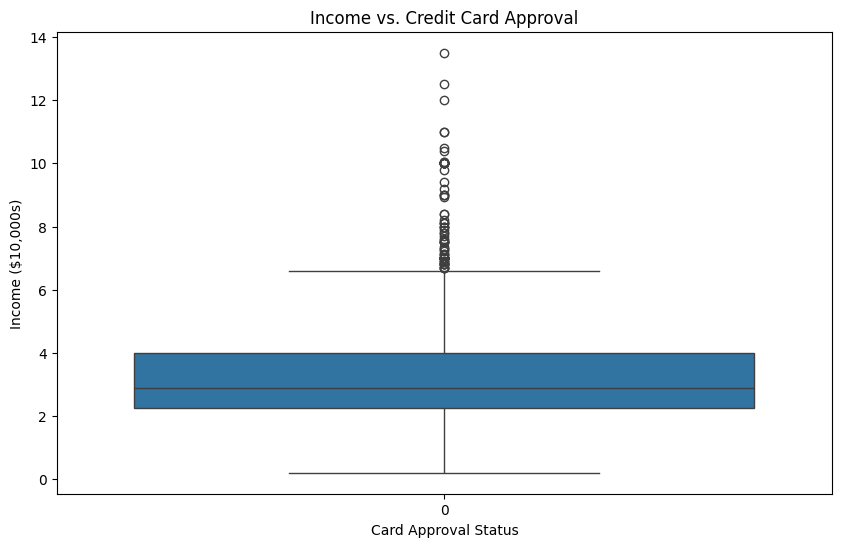

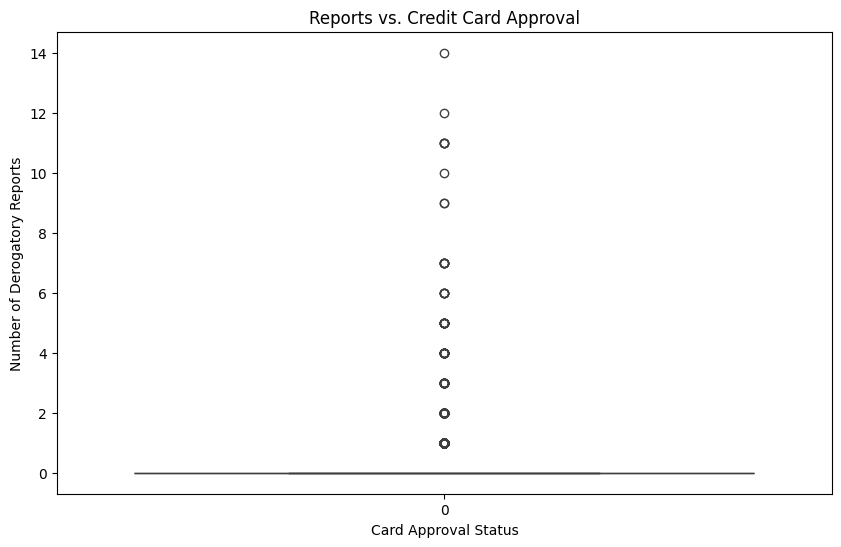

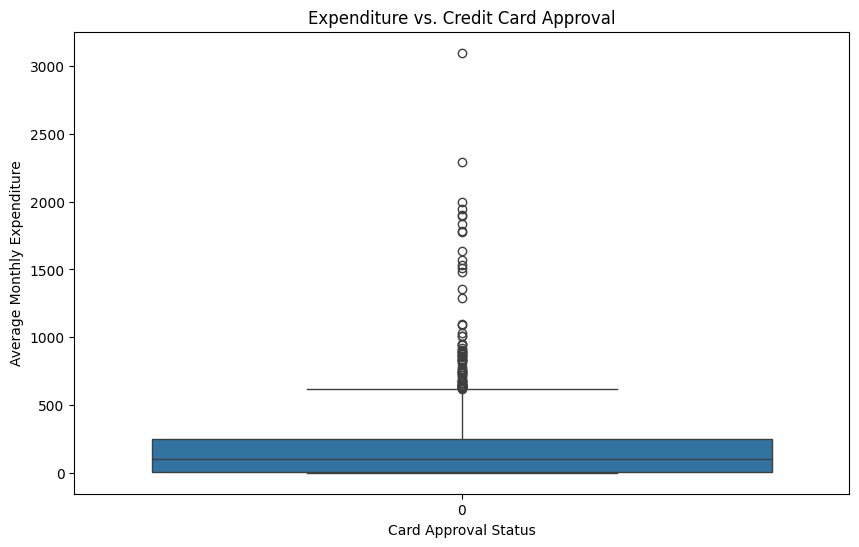

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the loaded DataFrame

# Plot 1: Income vs. Card Approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='card', y='income', data=df)
plt.title("Income vs. Credit Card Approval")
plt.xlabel("Card Approval Status")
plt.ylabel("Income ($10,000s)")

# Plot 2: Reports vs. Card Approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='card', y='reports', data=df)
plt.title("Reports vs. Credit Card Approval")
plt.xlabel("Card Approval Status")
plt.ylabel("Number of Derogatory Reports")

# Plot 3: Expenditure vs. Card Approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='card', y='expenditure', data=df)
plt.title("Expenditure vs. Credit Card Approval")
plt.xlabel("Card Approval Status")
plt.ylabel("Average Monthly Expenditure")

plt.show()

1. Income: Higher-income applicants tend to have a greater likelihood of approval. This trend reflects the bank's preference for financially stable applicants who are likely to meet credit obligations.

2. Reports: Applicants with more derogatory reports are generally less likely to be approved, which suggests that a poor credit history significantly impacts the bank's decision.

3. Expenditure: Lower expenditure tends to be associated with higher approval rates. High spending, especially relative to income, might signal a riskier applicant profile.

In [ ]:
X = df.drop("card",axis=1)
y = df["card"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter = 500)

In [ ]:
model.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
#Q5
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix= confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'